**<span style="font-size: 24px;">Load Packages</span>**

In [142]:
# packages used in this tutorial 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import joblib

**<span style="font-size: 24px;">Load CSVs</span>**

In [143]:
ny = pd.read_csv(f'CSVafterClean2/ny_12.csv')
fl = pd.read_csv(f'CSVafterClean3/_12.csv')

**<span style="font-size: 24px;">Precipitation vs Time</span>**

In [144]:
#initialize dfs
ny_snip = ny
fl_snip = fl

# Convert 'time' column to datetime
ny_snip['time'] = pd.to_datetime(ny_snip['time'])
fl_snip['time'] = pd.to_datetime(fl_snip['time'])

# Group by date and calculate the average precipitation for each day
ny_snip = ny_snip.groupby(ny_snip['time'].dt.date)['prcp_total'].mean().reset_index() #can only use .dt accessor with datetimelike values
fl_snip = fl_snip.groupby(fl_snip['time'].dt.date)['prcp_total'].mean().reset_index()

#print('New York',ny_snip)
#print('Florida',fl_snip)

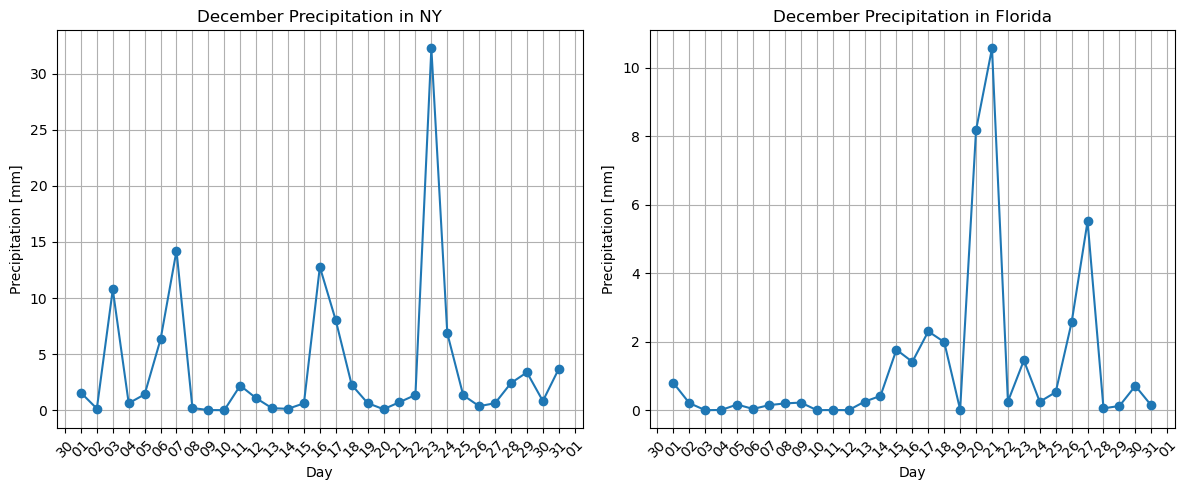

In [145]:
# Create subplots with two line graphs
plt.figure(figsize=(12, 5))  # Adjust the figure size as needed

plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
plt.plot(ny_snip['time'], ny_snip['prcp_total'], marker='o', linestyle='-')
plt.xlabel('Day')
plt.ylabel('Precipitation [mm]')
plt.title('December Precipitation in NY')
plt.grid(True)

# Format the x-axis ticks to show one label per day
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
# Format the x-axis ticks to show one label per month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Set tick interval to 1 day

plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
plt.plot(fl_snip['time'], fl_snip['prcp_total'], marker='o', linestyle='-')
plt.xlabel('Day')
plt.ylabel('Precipitation [mm]')
plt.title('December Precipitation in Florida')
plt.grid(True)

# Format the x-axis ticks to show one label per day
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
# Format the x-axis ticks to show one label per month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Set tick interval to 1 day

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

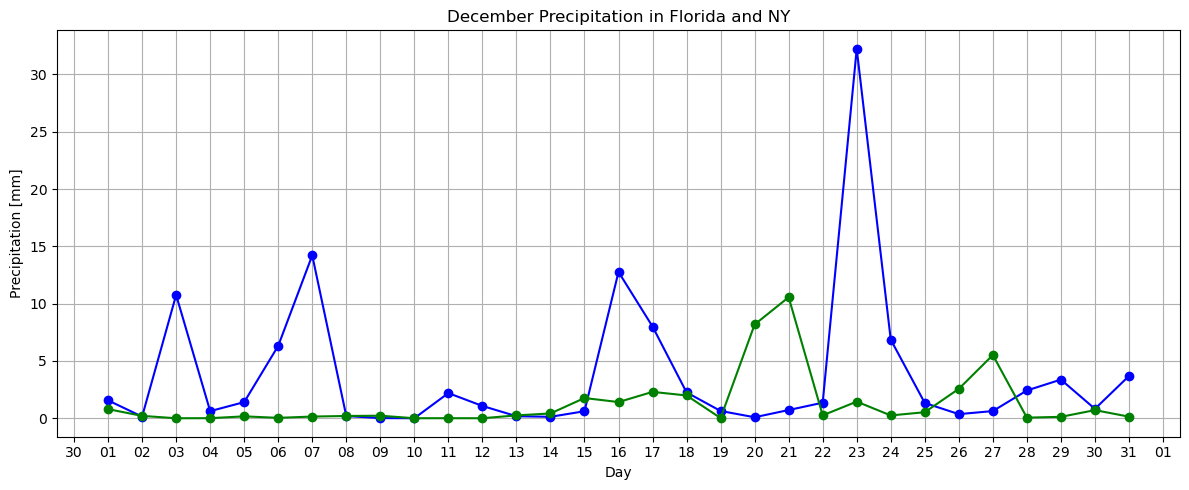

In [146]:
# Create subplots with two line graphs
plt.figure(figsize=(12, 5))  # Adjust the figure size as needed

plt.plot(ny_snip['time'], ny_snip['prcp_total'], color = 'b', marker='o', linestyle='-')
plt.xlabel('Day')
plt.ylabel('Precipitation [mm]')
plt.title('December Precipitation in NY')
plt.grid(True)

# Format the x-axis ticks to show one label per month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Set tick interval to 1 day

plt.plot(fl_snip['time'], fl_snip['prcp_total'], color = 'g', marker='o', linestyle='-')
plt.xlabel('Day')
plt.ylabel('Precipitation [mm]')
plt.title('December Precipitation in Florida and NY')
plt.grid(True)

# Format the x-axis ticks to show one label per month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))  # Set tick interval to 1 day

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

**<span style="font-size: 24px;">Spatial Distribution</span>**

C:\Users\yepesim\Anaconda3\envs\PakiMod\lib\site-packages\matplotlib\collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\yepesim\Anaconda3\envs\PakiMod\lib\site-packages\matplotlib\collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


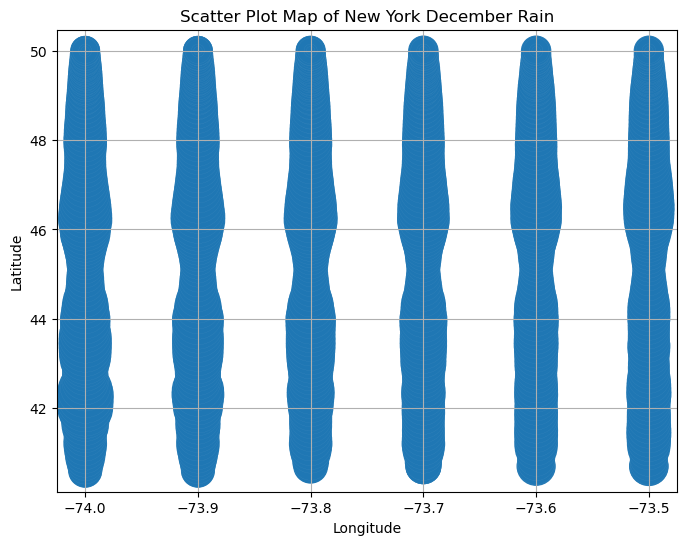

C:\Users\yepesim\Anaconda3\envs\PakiMod\lib\site-packages\matplotlib\collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\yepesim\Anaconda3\envs\PakiMod\lib\site-packages\matplotlib\collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


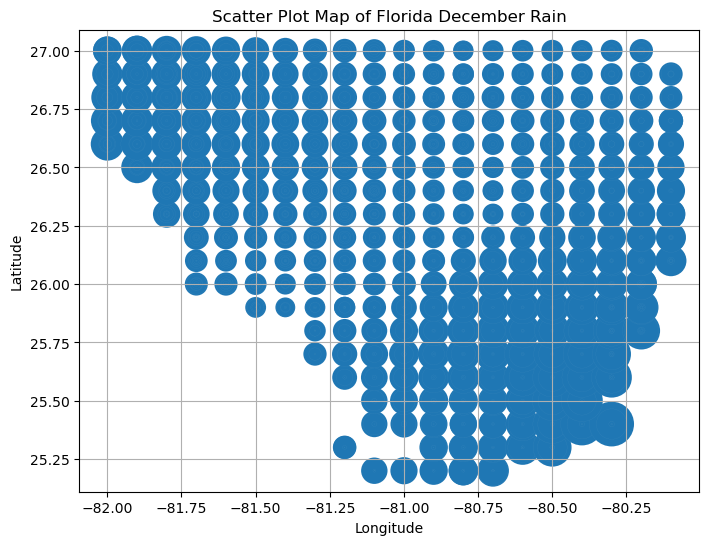

In [147]:
locations = {'New York': ny, 'Florida': fl}

for location, df in locations.items():
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='lon', y='lat', data=df, marker='o', s=df['prcp_total']*30)
    plt.title(f"Scatter Plot Map of {location} December Rain")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.grid(True)
    # Save the plot to a file (optional)
    # plt.savefig(f"CSVafterClean/map_prpc_{location}.png", dpi=300, bbox_inches='tight')
    # Show the plot (optional)
    plt.show()


**<span style="font-size: 24px;">Group Categorically</span>**

In [148]:
def catAn(df):
    df = df['next_day_prcp_total']
    # Calculate statistics
    mean = np.mean(df)
    std_dev = np.std(df)
    # Calculate the percentiles
    a = 0.6
    b = 0.95
    percentile_a = df.quantile(a)
    percentile_b = df.quantile(b)
    # Count data points within the percentile ranges
    count_below_a = np.sum(df < percentile_a)
    count_a_to_b = np.sum((df >= percentile_a) & (df <= percentile_b))
    count_above_b = np.sum(df > percentile_b)

    # Create subplots with two histograms
    plt.figure(figsize=(12, 5))  # Adjust the figure size as needed

    plt.subplot(1, 2, 1)  # 1 row, 2 columns, subplot 1
    plt.hist(df, bins=20, density=True, alpha=0.6, color='b')
    plt.axvline(mean, color='k', linestyle='dashed', linewidth=2, label=f"Mean = {mean:.2f}")
    plt.axvline(mean + std_dev, color='r', linestyle='dashed', linewidth=2, label=f"Std Deviation = {std_dev:.2f}", )
    plt.axvline(mean - std_dev, color='r', linestyle='dashed', linewidth=2)
    plt.legend()
    plt.title("Distribution of Data")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

    plt.subplot(1, 2, 2)  # 1 row, 2 columns, subplot 2
    plt.hist(df, bins=20, density=True, alpha=0.6, color='b')
    plt.axvline(percentile_a, color='g', linestyle='dashed', linewidth=2, label=f"Percentile {int(a*100)}% = {percentile_a:.2f} mm")
    plt.axvline(percentile_b, color='b', linestyle='dashed', linewidth=2, label=f"Percentile {int(b*100)}% = {percentile_b:.2f} mm", )
    plt.legend()
    plt.title("Distribution of Data")
    plt.xlabel("Value")
    plt.ylabel("Frequency")

    plt.tight_layout()  # Adjust spacing between subplots
    plt.show()

    print('Category 0 is from 0 to ' + str(round(percentile_a, 3)) + ' mm of rain')
    print(f"Number of data points below the {a*100}% percentile: {count_below_a}")
    print('Category 1 is from ' + str(round(percentile_a, 3)) + ' mm of rain to ' + str(round(percentile_b, 3)) + ' mm of rain')
    print(f"Number of data points in the {a*100}% to {b*100}% range: {count_a_to_b}")
    print('Category 2 is from ' + str(round(percentile_b, 3)) + ' mm of rain to the maximum')
    print(f"Number of data points above the {b*100}% percentile: {count_above_b}")
  
    # Create categorical labels based on percentiles
    dfCol = pd.cut(
        df,
        bins=[float('-inf'), percentile_a, percentile_b, float('inf')],
        labels=['0', '1', '2']
    )
    
    return dfCol

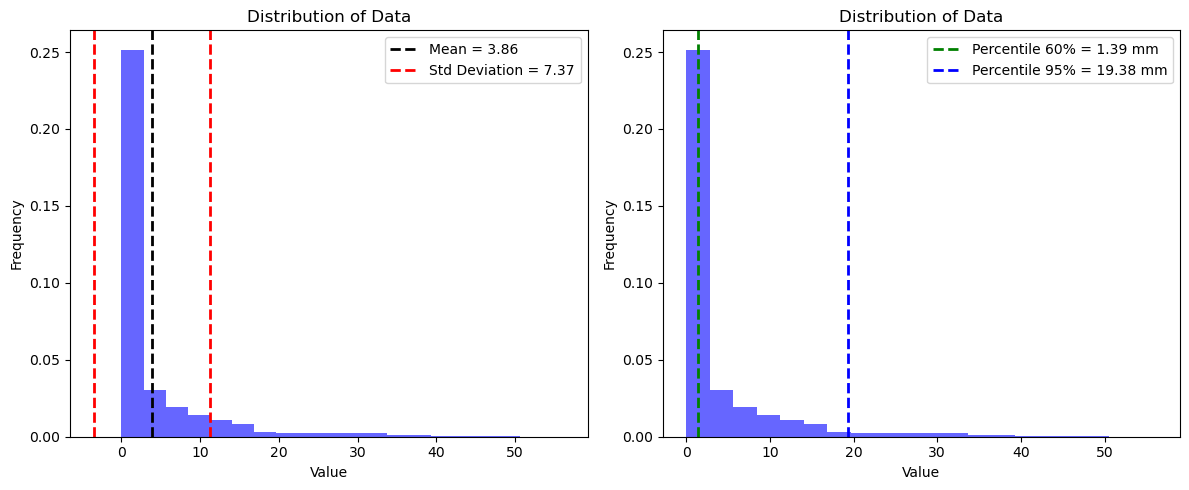

Category 0 is from 0 to 1.391 mm of rain
Number of data points below the 60.0% percentile: 10452
Category 1 is from 1.391 mm of rain to 19.378 mm of rain
Number of data points in the 60.0% to 95.0% range: 6098
Category 2 is from 19.378 mm of rain to the maximum
Number of data points above the 95.0% percentile: 872


In [149]:
ny['nxtpr_cat'] = catAn(ny)

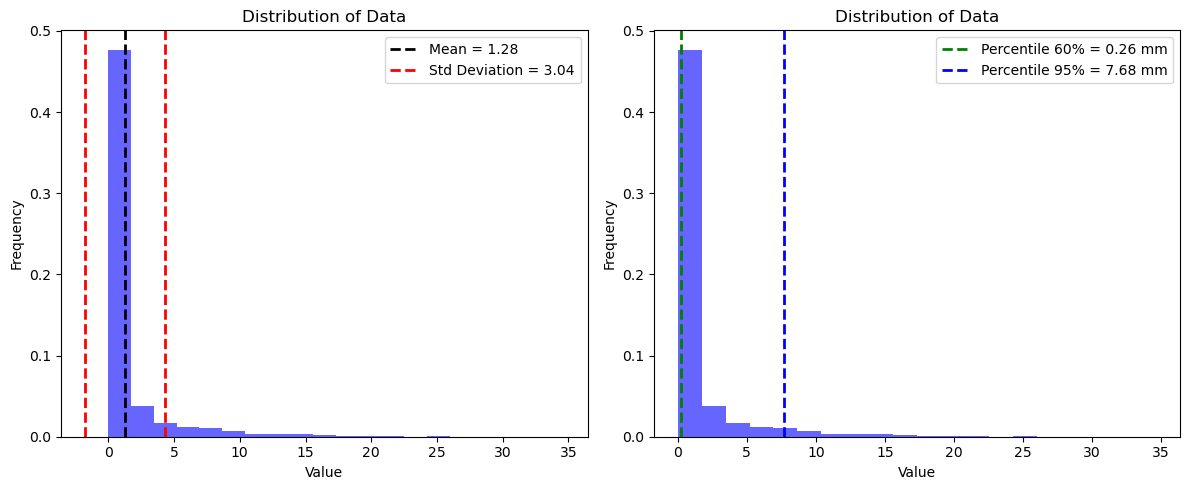

Category 0 is from 0 to 0.255 mm of rain
Number of data points below the 60.0% percentile: 5189
Category 1 is from 0.255 mm of rain to 7.678 mm of rain
Number of data points in the 60.0% to 95.0% range: 3027
Category 2 is from 7.678 mm of rain to the maximum
Number of data points above the 95.0% percentile: 433


In [150]:
fl['nxtpr_cat'] = catAn(fl)

**<span style="font-size: 24px;">Data</span>**

In [151]:
print(ny[['next_day_prcp_total', 'nxtpr_cat']])

       next_day_prcp_total nxtpr_cat
0                 0.000858         0
1                10.728631         1
2                 0.001715         0
3                 0.001715         0
4                 3.843783         1
...                    ...       ...
17417             1.180921         0
17418            11.342675         1
17419             3.285482         1
17420             1.258963         0
17421             0.165100         0

[17422 rows x 2 columns]


In [152]:
print(fl[['next_day_prcp_total', 'nxtpr_cat']])

      next_day_prcp_total nxtpr_cat
0                0.428093         1
1                0.001057         0
2                0.000529         0
3                0.016912         0
4                0.125785         0
...                   ...       ...
8644             0.228316         0
8645             0.025368         0
8646             0.935990         1
8647             0.420694         1
8648             0.082199         0

[8649 rows x 2 columns]


**<span style="font-size: 24px;">Load Models</span>**

In [153]:
# Load the Neural Network model using joblib
model_nn = joblib.load("nn_rain_ext.pkl")

# Load the Random Forest model using joblib
model_rf = joblib.load("rf_rain_ext.pkl")

# Load the XGBoost model using joblib
model_xg = joblib.load("xg_rain_ext.pkl")

print("Models Loaded")

Models Loaded


**<span style="font-size: 24px;">Generate Predictions</span>**

In [154]:
def gen_pred(df):
    exclude = ['next_day_prcp_total', 'nxtpr_cat', 'time', 'lat', 'lon']
    features = df.loc[:, ~df.columns.isin(exclude)]
    pred_nn = model_nn.predict(features)
    pred_rf = model_rf.predict(features)
    pred_xg = model_xg.predict(features)
    
    df['nn_pred'] = pred_nn # separate assigning it to df as a column bc otherwise the features 45 col instead of model's expected 44
    df['rf_pred'] = pred_rf
    df['xg_pred'] = pred_xg

    return df

In [155]:
pred_ny = ny
pred_fl = fl
pred_ny = gen_pred(pred_ny)
pred_fl = gen_pred(pred_fl)
pred_ny = pred_ny.loc[:,['next_day_prcp_total', 'nxtpr_cat','time','nn_pred','rf_pred','xg_pred']]
pred_fl = pred_fl.loc[:,['next_day_prcp_total', 'nxtpr_cat','time','nn_pred','rf_pred','xg_pred']]

271/271 [==============================] - 0s 610us/step


In [156]:
pred_ny.dtypes

next_day_prcp_total           float64
nxtpr_cat                    category
time                   datetime64[ns]
nn_pred                       float32
rf_pred                        object
xg_pred                         int64
dtype: object

In [165]:
# Check if there are any NA values in the specified columns
any_na = pred_ny[['xg_pred', 'rf_pred', 'nxtpr_cat']].isna().any()
print(any_na)

xg_pred      False
rf_pred       True
nxtpr_cat     True
dtype: bool


In [166]:
# Check for NA values in 'xg_pred' column
xg_pred_na = pred_ny['xg_pred'].isna().sum()

# Check for NA values in 'rf_pred' column
rf_pred_na = pred_ny['rf_pred'].isna().sum()

# Check for NA values in 'nxtpr_cat' column
nxtpr_cat_na = pred_ny['nxtpr_cat'].isna().sum()

print(f'NA values in xg_pred: {xg_pred_na}')
print(f'NA values in rf_pred: {rf_pred_na}')
print(f'NA values in nxtpr_cat: {nxtpr_cat_na}')


NA values in xg_pred: 0
NA values in rf_pred: 17422
NA values in nxtpr_cat: 17422


In [157]:
# Convert 'xg_pred' and 'rf_pred' to categorical with specified categories
categories = [0, 1, 2]  # Define the categories

pred_ny.loc[:, 'xg_pred'] = pd.Categorical(pred_ny['xg_pred'], categories=categories)
pred_ny.loc[:, 'rf_pred'] = pd.Categorical(pred_ny['rf_pred'], categories=categories)

C:\Users\yepesim\AppData\Local\Temp\ipykernel_31312\2912659506.py:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  pred_ny.loc[:, 'rf_pred'] = pd.Categorical(pred_ny['rf_pred'], categories=categories)


In [162]:
# Define the categories for nxtpr_cat
nxtpr_cat_categories = [0, 1, 2]

# Convert 'nxtpr_cat' to categorical with specified categories
pred_ny['nxtpr_cat'] = pd.Categorical(pred_ny['nxtpr_cat'], categories=nxtpr_cat_categories)

# Define the categories for 'rf_pred' and 'xg_pred'
categories = [0, 1, 2]

# Convert 'rf_pred' and 'xg_pred' to categorical with specified categories
pred_ny['rf_pred'] = pd.Categorical(pred_ny['rf_pred'], categories=categories)
pred_ny['xg_pred'] = pd.Categorical(pred_ny['xg_pred'], categories=categories)

# Ensure the categories match for 'rf_pred' and 'xg_pred'
assert pred_ny['rf_pred'].cat.categories.equals(pred_ny['xg_pred'].cat.categories), "Categories do not match."

# Now you can compare the categorical columns
rf_accuracy = (pred_ny['nxtpr_cat'] == pred_ny['rf_pred']).mean()
xg_accuracy = (pred_ny['nxtpr_cat'] == pred_ny['xg_pred']).mean()


TypeError: Categoricals can only be compared if 'categories' are the same.

In [163]:
pred_ny.dtypes

next_day_prcp_total           float64
nxtpr_cat                    category
time                   datetime64[ns]
nn_pred                       float32
rf_pred                      category
xg_pred                      category
dtype: object

In [167]:
pred_ny

,next_day_prcp_total,nxtpr_cat,time,nn_pred,rf_pred,xg_pred
0,0.000858,NaN,2022-12-01,278726.656250,NaN,1
1,10.728631,NaN,2022-12-02,-46810.664062,NaN,0
2,0.001715,NaN,2022-12-03,917657.062500,NaN,0
3,0.001715,NaN,2022-12-04,336517.875000,NaN,1
4,3.843783,NaN,2022-12-05,-33175.972656,NaN,0
...,...,...,...,...,...,...
17417,1.180921,NaN,2022-12-27,43307.023438,NaN,0
17418,11.342675,NaN,2022-12-28,43064.070312,NaN,0
17419,3.285482,NaN,2022-12-29,73968.187500,NaN,1
17420,1.258963,NaN,2022-12-30,399345.156250,NaN,0


**<span style="font-size: 24px;">Evaluate Neural Network Regression</span>**

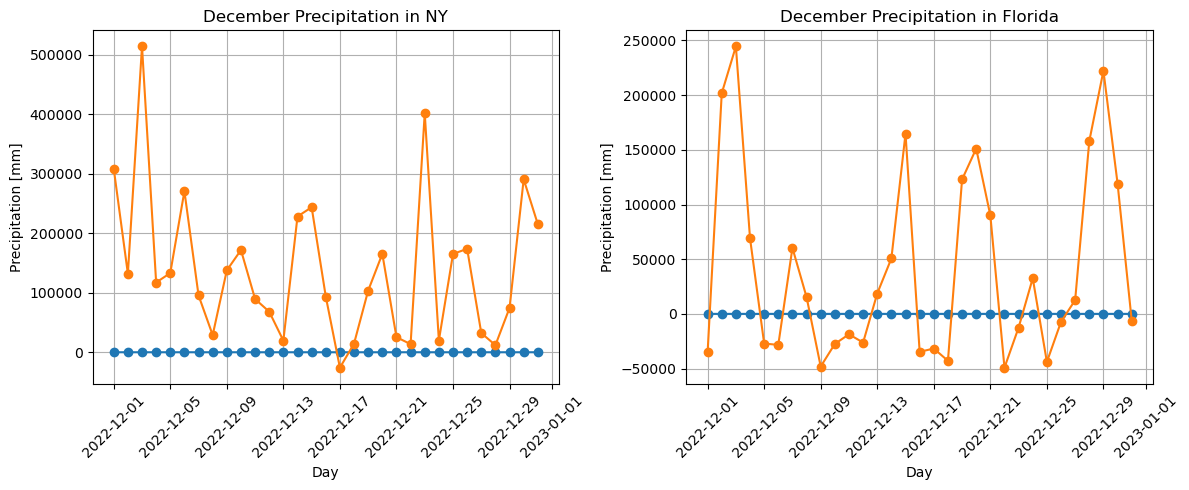

In [158]:
# Initialize DataFrames
ny_snip_pred = pred_ny.copy()
fl_snip_pred = pred_fl.copy()

# Convert 'time' column to datetime
ny_snip_pred['time'] = pd.to_datetime(ny_snip_pred['time'])
fl_snip_pred['time'] = pd.to_datetime(fl_snip_pred['time'])

# Group by date and calculate the average precipitation for each day
ny_snip_pred = ny_snip_pred.groupby(ny_snip_pred['time'].dt.date)[['next_day_prcp_total', 'nn_pred']].mean().reset_index()
fl_snip_pred = fl_snip_pred.groupby(fl_snip_pred['time'].dt.date)[['next_day_prcp_total', 'nn_pred']].mean().reset_index()

# Create subplots with two line graphs
plt.figure(figsize=(12, 5))

# Plot NY data
plt.subplot(1, 2, 1)
plt.plot(ny_snip_pred['time'], ny_snip_pred['next_day_prcp_total'], marker='o', linestyle='-', label='Actual')
plt.plot(ny_snip_pred['time'], ny_snip_pred['nn_pred'], marker='o', linestyle='-', label='Predicted')
plt.xlabel('Day')
plt.ylabel('Precipitation [mm]')
plt.title('December Precipitation in NY')
plt.grid(True)
plt.xticks(rotation=45)

# Plot FL data
plt.subplot(1, 2, 2)
plt.plot(fl_snip_pred['time'], fl_snip_pred['next_day_prcp_total'], marker='o', linestyle='-', label='Actual')
plt.plot(fl_snip_pred['time'], fl_snip_pred['nn_pred'], marker='o', linestyle='-', label='Predicted')
plt.xlabel('Day')
plt.ylabel('Precipitation [mm]')
plt.title('December Precipitation in Florida')
plt.grid(True)
plt.xticks(rotation=45)

plt.tight_layout()  # Adjust spacing between subplots
plt.show()


**<span style="font-size: 24px;">Evaluate Random Forest & XGBoost Classifiers</span>**

In [159]:
pred_ny['nxtpr_cat'] = pred_ny['nxtpr_cat'].astype('category')

# Select the columns of interest
columns_to_compare = ['nxtpr_cat', 'rf_pred', 'xg_pred']

# Create a new DataFrame containing only these columns
comparison_df = pred_ny[columns_to_compare]

# Example 1: Count the occurrences of each category in each column
value_counts = comparison_df.apply(lambda x: x.value_counts()).T

# Example 2: Create a cross-tabulation table
cross_tab = pd.crosstab(index=comparison_df['nxtpr_cat'], columns=[comparison_df['rf_pred'], comparison_df['xg_pred']])

# Example 3: Calculate the agreement between 'nxtpr_cat' and 'rf_pred'
rf_accuracy = (comparison_df['nxtpr_cat'] == comparison_df['rf_pred']).mean()

# Example 4: Calculate the agreement between 'nxtpr_cat' and 'xg_pred'
xg_accuracy = (comparison_df['nxtpr_cat'] == comparison_df['xg_pred']).mean()

TypeError: Categoricals can only be compared if 'categories' are the same.

In [ ]:
print(f'Value counts are {value_counts}')
print(f'Cross tab is {cross_tab}')
print(f'XGBoost accuracy is {xg_accuracy}')
print(f'Random Forest accuracy is {rf_accuracy}')

**<span style="font-size: 24px;">Discussion</span>**